In [24]:
import sklearn,math, itertools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
import time
from joblib import dump, load

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [25]:

x_test = pd.read_csv("../evaluation/X_test.csv")


x_test = x_test[x_test["winner"] != "Draw"]
y_test = x_test["winner"] != "Black"
x_test = x_test[x_test.columns[4:]]

data = pd.read_csv("../evaluation/X_train.csv")

print(len(data[data["fen"].duplicated()]["fen"].unique()))
data = data.drop_duplicates(subset=['fen'], keep='last').reset_index(drop=True)
len(data)




3161


136596

In [26]:
data

,fen,winner,move number,total moves,W_material sum,W_pawn control,W_piece squares sum,W_diagonal control,W_center control,W_doubled pawns,...,B_piece squares sum,B_diagonal control,B_center control,B_doubled pawns,B_mobility,B_both bishops,B_not all pawns,B_pinned evaluation,B_attacker evalutation,B_has queen
0,rnb2rk1/ppq1bppp/4pn2/2P5/2N5/6P1/PP2PPBP/RNBQ...,Draw,52,156,38,2,3983,1,4,0,...,3894,0,3,0,35,1,1,0,2,1
1,1rbr1bk1/ppq2ppp/4pn2/8/2N5/1N2Q1P1/PP2PPBP/2R...,Draw,155,156,34,2,3561,1,4,0,...,3575,0,4,0,42,1,1,0,4,1
2,1rbrk3/pp2bppp/4pn2/N3N3/1P6/P5P1/4PPBP/2RR2K1...,Draw,50,156,25,2,2580,1,5,0,...,2542,0,3,0,27,1,1,0,6,0
3,1rbRk3/pp2b1pp/1n2pp2/N3N3/1P6/P5P1/4PPBP/2R2K...,Draw,16,156,25,2,2562,1,5,0,...,2001,0,2,0,2,1,1,0,9,0
4,1rbbk3/pp4pp/1n2pp2/N7/1P6/P2N2P1/4PPBP/2R2K2 ...,Draw,125,156,20,2,2007,1,3,0,...,1973,0,2,0,20,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136591,rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR ...,Black,1,56,39,1,3927,0,4,0,...,3892,0,0,0,20,1,0,0,0,1
136592,rnbqkb1r/pppppppp/5n2/8/3P4/8/PPP1PPPP/RNBQKBN...,Black,7,56,39,1,3927,0,4,0,...,3928,0,2,0,28,1,0,0,0,1
136593,rnbqk2r/ppp2ppp/4pn2/3p4/1bPP4/5N2/PP1NPPPP/R1...,Black,0,56,39,1,3996,0,6,0,...,3998,0,4,0,20,1,0,3,4,1
136594,r1bq1rk1/1p1nbppp/1Pp2n2/p1Ppp3/Q2P4/PN2PN2/1B...,Black,24,56,39,1,4046,1,4,0,...,4105,0,8,0,23,1,0,0,3,1


In [27]:



data_win = data[data["winner"] == "White"]
print(len(data_win))
data_lose = data[data["winner"] == "Black"]
print(len(data_lose))
data_draw = data[data["winner"] == "Draw"]
print(len(data_draw))

data_win = data_win.sample(25000)

data_lose = data_lose.sample(25000)

data = data_win.append(data_lose)
data.reset_index(drop=True)

51675
41132
43789


,fen,winner,move number,total moves,W_material sum,W_pawn control,W_piece squares sum,W_diagonal control,W_center control,W_doubled pawns,...,B_piece squares sum,B_diagonal control,B_center control,B_doubled pawns,B_mobility,B_both bishops,B_not all pawns,B_pinned evaluation,B_attacker evalutation,B_has queen
0,rnbqkb1r/1p2pppp/p1p2n2/3p4/P1PP4/2N2N2/1P2PPP...,White,3,99,39,1,4019,0,6,0,...,3988,0,4,0,30,1,0,0,1,1
1,r3r1k1/p1p2ppp/8/2p5/4b3/6P1/PP3PBP/3R1RK1 w -...,White,17,125,18,3,1809,1,3,1,...,1849,1,6,0,26,0,1,0,3,0
2,6n1/pR4Np/2p1P3/2Pp4/3P1k2/2K5/r7/8 w - - 7 54,White,62,135,11,3,1160,0,4,0,...,1076,0,5,0,19,0,1,0,0,0
3,8/1pqbrk2/p1pR1p2/4pPP1/2P1B2p/8/PP1Q2K1/8 b -...,White,16,83,22,3,2346,1,4,0,...,2319,0,5,0,22,0,1,0,7,1
4,rn1qkb1r/4pppp/b2p1n2/2pP4/4P3/2N5/PP3PPP/R1BQ...,White,12,113,38,1,3939,0,7,0,...,3842,0,4,0,30,1,1,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,6k1/8/2N5/3K4/3N4/7p/1P6/3r4 w - - 0 51,Black,99,112,7,1,778,0,7,0,...,614,0,1,0,15,0,1,3,3,0
49996,r2q1rk1/pb1nppbp/1p3np1/8/3NN3/2PB4/PP3PPP/R1B...,Black,11,78,37,2,3948,0,6,0,...,3940,2,3,0,51,1,1,0,3,1
49997,2R1b3/5k1p/3p2p1/1p1P4/pP6/P2r4/6BP/6K1 w - - ...,Black,35,102,12,3,1230,1,4,0,...,1244,0,3,0,21,0,1,0,2,0
49998,8/3k3p/p2P1np1/5p2/P7/1P4P1/2r5/3R1KB1 w - - 1 36,Black,38,86,12,2,1153,0,2,0,...,1144,0,2,0,19,0,1,0,1,0


In [28]:
feature_cols = data.columns[4:]

target = data["winner"] != "Black"



features = data[feature_cols]
scaler =  MinMaxScaler()
features_transformed = scaler.fit_transform(features)
features = pd.DataFrame(features_transformed, columns=features.columns)

dump(scaler, 'scaler_FINAL.save') 
x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test, columns=features.columns)

x_train = features
y_train = target






# x_train, x_test, y_train, y_test = train_test_split(features, target, shuffle=True, test_size=0.15)

/Users/szlota777/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/szlota777/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


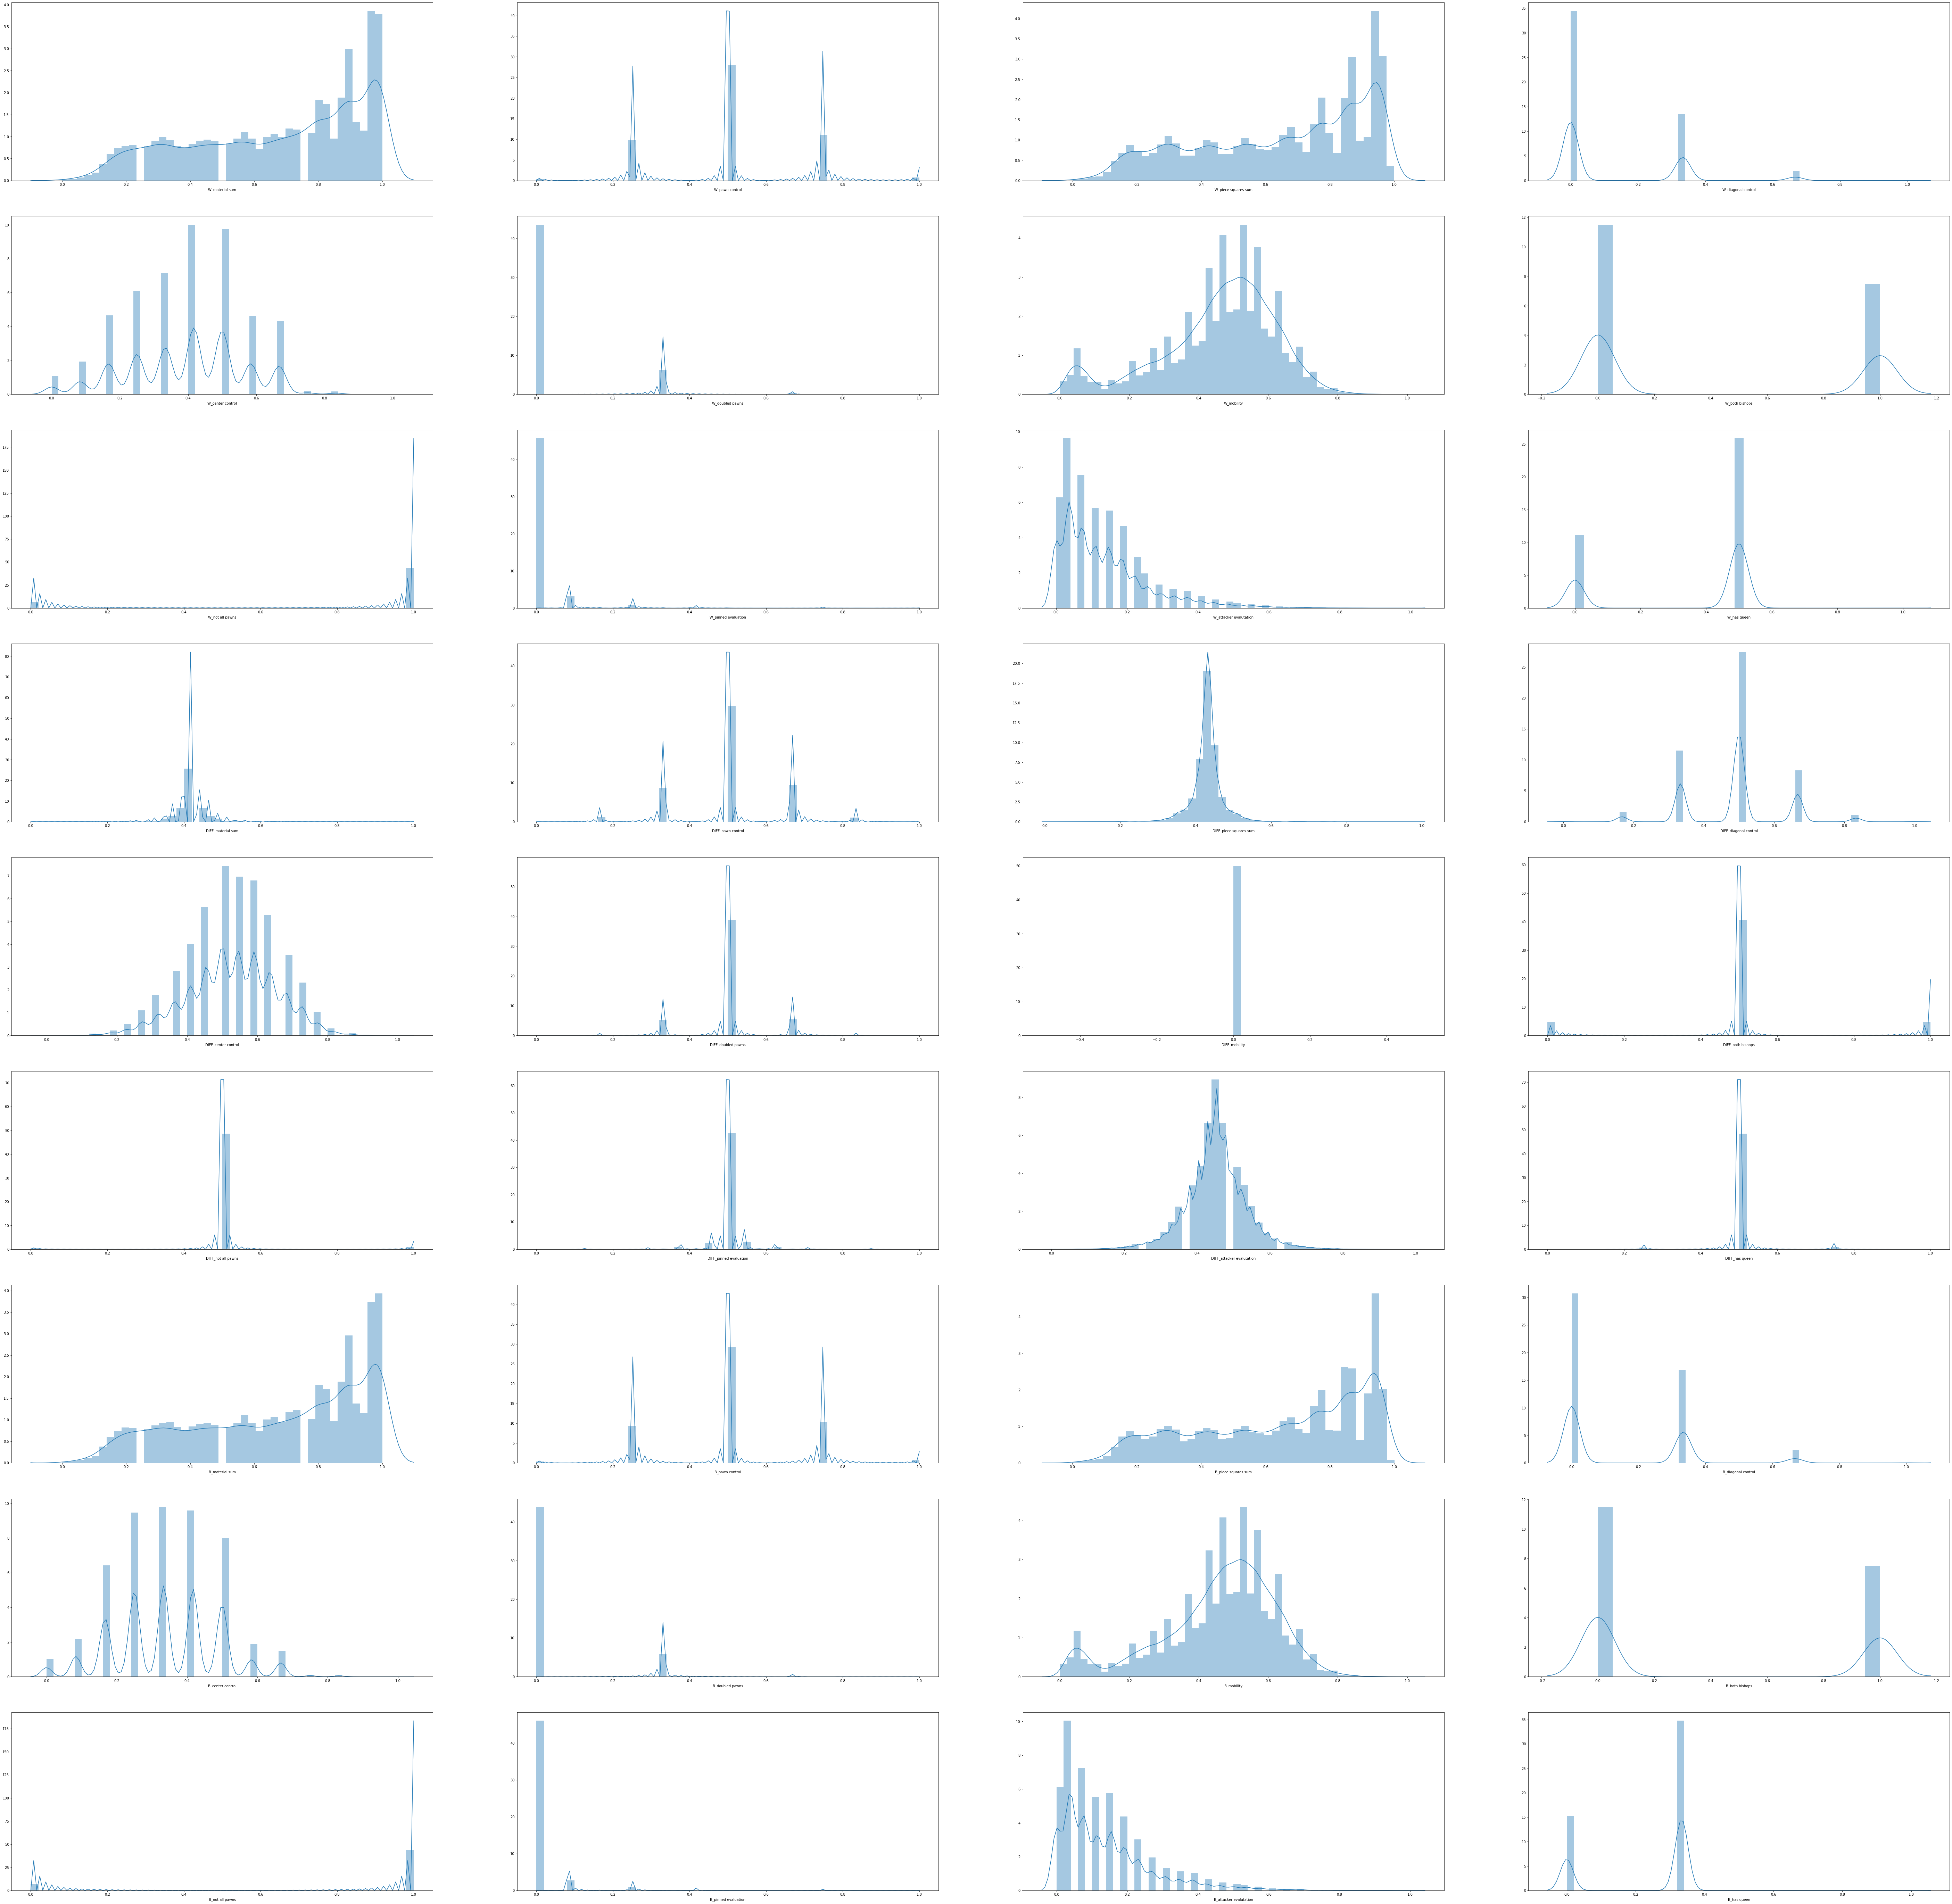

In [29]:
fig, axs = plt.subplots(9, 4, figsize=(100, 100))

for i in range(len(feature_cols)):
    sns.distplot(features[feature_cols[i]], ax=axs.flat[i])
plt.show()

In [30]:
x_train.describe()

,W_material sum,W_pawn control,W_piece squares sum,W_diagonal control,W_center control,W_doubled pawns,W_mobility,W_both bishops,W_not all pawns,W_pinned evaluation,...,B_piece squares sum,B_diagonal control,B_center control,B_doubled pawns,B_mobility,B_both bishops,B_not all pawns,B_pinned evaluation,B_attacker evalutation,B_has queen
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.672616,0.509625,0.648472,0.118100,0.395317,0.045007,0.458091,0.394520,0.872220,0.013013,...,0.644417,0.145367,0.342567,0.042907,0.458091,0.395380,0.867240,0.012488,0.139669,0.231767
std,0.268298,0.177916,0.261092,0.188142,0.168150,0.119384,0.165147,0.488752,0.333848,0.056903,...,0.258837,0.197542,0.148640,0.116844,0.165147,0.488937,0.339319,0.057829,0.129477,0.153674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461538,0.500000,0.429604,0.000000,0.250000,0.000000,0.376812,0.000000,1.000000,0.000000,...,0.427376,0.000000,0.250000,0.000000,0.376812,0.000000,1.000000,0.000000,0.038462,0.000000
50%,0.743590,0.500000,0.706993,0.000000,0.416667,0.000000,0.492754,0.000000,1.000000,0.000000,...,0.703927,0.000000,0.333333,0.000000,0.492754,0.000000,1.000000,0.000000,0.115385,0.333333
75%,0.897436,0.500000,0.873893,0.333333,0.500000,0.000000,0.565217,1.000000,1.000000,0.000000,...,0.867302,0.333333,0.416667,0.000000,0.565217,1.000000,1.000000,0.000000,0.192308,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
clf = LogisticRegression(solver='saga', tol=1e-2, max_iter=200)
clf.fit(x_train, y_train)

LogisticRegression(max_iter=200, solver='saga', tol=0.01)

In [32]:
dump(clf, 'clf_FINAL.save') 

['clf_FINAL.save']

In [33]:
kfold = KFold(n_splits=5, shuffle=True)


scores = cross_val_score(estimator=clf, X=x_train, y=y_train, cv=kfold)

scores.mean()


0.6533800000000001

In [34]:
estimator = clf
train_acc = estimator.score(x_train, y_train)
print(train_acc)

0.65442


In [35]:
test_acc = estimator.score(x_test, y_test)
print(test_acc)

0.6422783415938951


In [36]:
y_pred = estimator.predict(x_test)
y_true = list(y_test)

Normalized confusion matrix


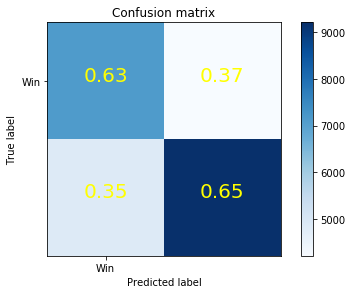

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=20,
                 horizontalalignment="center",
                 color="yellow" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
plot_confusion_matrix(metrics.confusion_matrix(y_true, y_pred), classes=["Win"])

In [38]:
def matrix_metrix(y_true, y_pred):
    CM = metrics.confusion_matrix(y_true, y_pred)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    Population = TN + FN + TP + FP
    Prevalence = round((TP + FP) / Population, 3)
    Accuracy = round((TP + TN) / Population, 3)
    Precision = round(TP / (TP + FP), 3)
    NPV = round(TN / (TN + FN), 3)
    FDR = round(FP / (TP + FP), 3)
    FOR = round(FN / (TN + FN), 3)
    check_Pos = Precision + FDR
    check_Neg = NPV + FOR
    Recall = round(TP / (TP + FN), 3)
    FPR = round(FP / (TN + FP), 3)
    Specificity = 1 - FPR
    FNR = round(FN / (TP + FN), 3)
    TNR = round(TN / (TN + FP), 3)
    check_Pos2 = Recall + FNR
    check_Neg2 = FPR + TNR
    LRPos = round(Recall / FPR, 3)
    LRNeg = round(FNR / TNR, 3)
    DOR = round(LRPos / LRNeg)
    F1 = round(2 * ((Precision * Recall) / (Precision + Recall)), 4)
    F2 = round((1 + 2 ** 2) * ((Precision * Recall) / ((2 ** 2 * Precision) + Recall)), 4)
    MCC = -1
#     MCC = round(((TP * TN) - (FP * FN)) / math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)), 4)
    BM = Recall + TNR - 1
    MK = Precision + NPV - 1
#     AUC = round(metrics.roc_auc_score(y_true, prediction), 3)

    met_dict = {
        'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 'Prevalence': Prevalence,
        'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall,
        'F1': F1, 'F2': F2,
        # 'AUC':AUC,
        'NPV': NPV, 'FPR': FPR,
        'TNR': Specificity, 'FNR': FNR, 'TNR': TNR, 'FDR': FDR, 'FOR': FOR, 'check_Pos': check_Pos,
        'check_Neg': check_Neg, 'check_Pos2': check_Pos2, 'check_Neg2': check_Neg2, 'LR+': LRPos,
        'LR-': LRNeg, 'DOR': DOR, 'MCC': MCC, 'BM': BM, 'MK': MK
    }

    return met_dict
matrix_metrix(y_true, y_pred)

{'TP': 9203,
 'TN': 7125,
 'FP': 4220,
 'FN': 4874,
 'Prevalence': 0.528,
 'Accuracy': 0.642,
 'Precision': 0.686,
 'Recall': 0.654,
 'F1': 0.6696,
 'F2': 0.6602,
 'NPV': 0.594,
 'FPR': 0.372,
 'TNR': 0.628,
 'FNR': 0.346,
 'FDR': 0.314,
 'FOR': 0.406,
 'check_Pos': 1.0,
 'check_Neg': 1.0,
 'check_Pos2': 1.0,
 'check_Neg2': 1.0,
 'LR+': 1.758,
 'LR-': 0.551,
 'DOR': 3.0,
 'MCC': -1,
 'BM': 0.28200000000000003,
 'MK': 0.28}

In [39]:
def acc_with_thresh(x=x_test, y=y_test, thresh=0.25):
    probs = estimator.predict_proba(x_test)
    n = len(x)
    assert n == len(y)
    total = 0

    for i in range(n):
        prediction = probs[i][1] > thresh
#         print(probs[i][1], prediction, y_true[i])
        if prediction == y_true[i]:
            total+=1
    return total/n

In [40]:
acc_with_thresh()

0.583785697427425